In [4]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [5]:
import astropy.units as u
import numpy as np

import grasshopper.interferometers as ifo
import grasshopper.sources as sources

import matplotlib.pyplot as plt
#plt.style.use("/home/daniel/thesis/thesis-style.mpl")

import thesis

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1120: UserWarning: 'SourceCodePro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


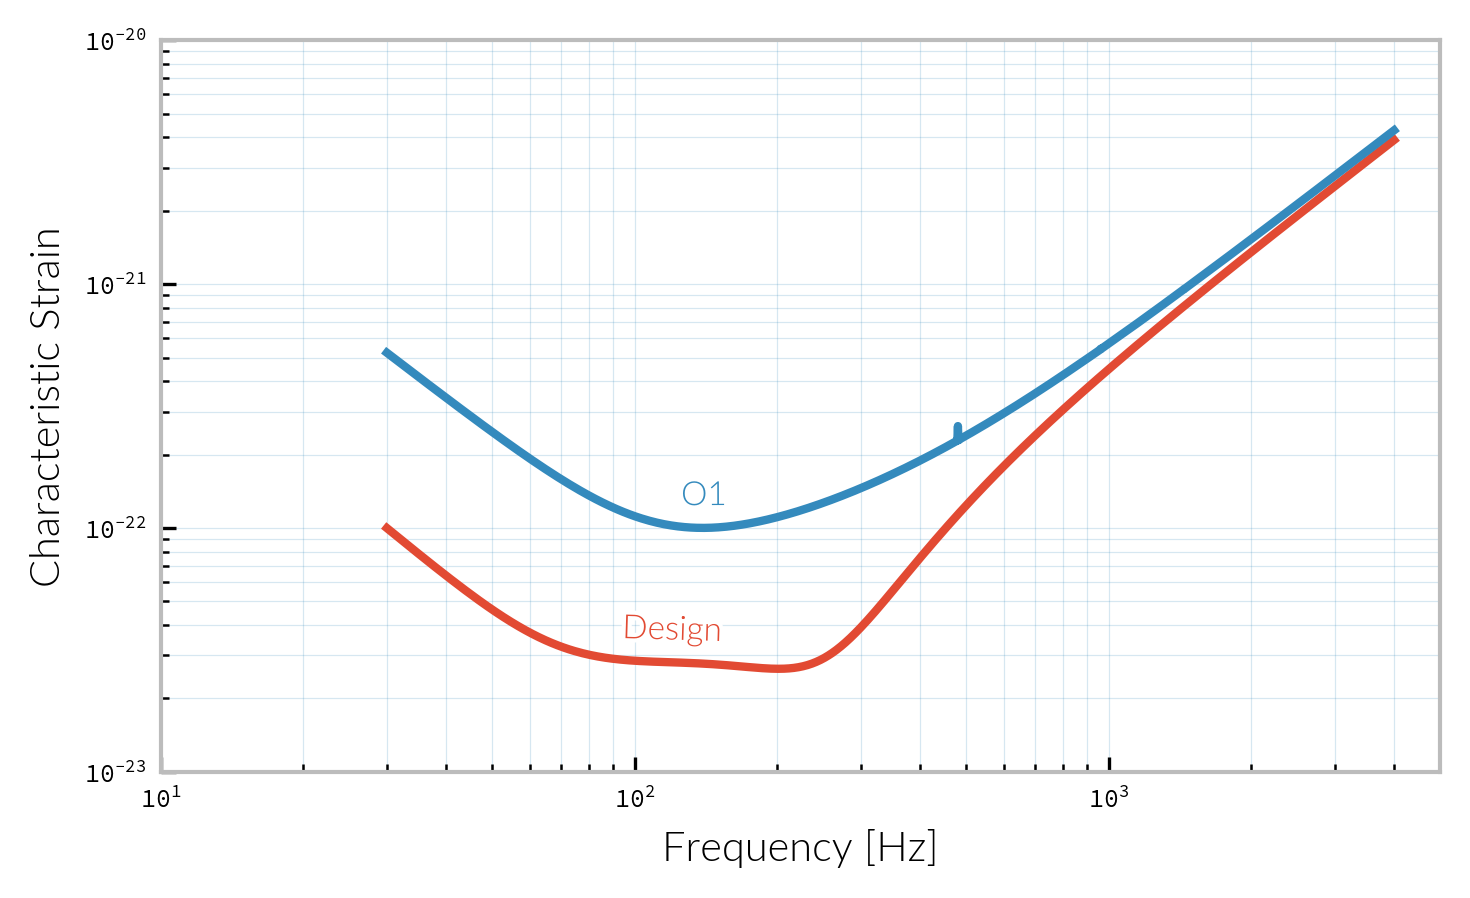

In [7]:
aligo = ifo.AdvancedLIGO()
avirgo = ifo.Virgo
aligo_o1 = ifo.AdvancedLIGO(configuration="O1")
figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, figsize=figsize, dpi=300)
aligo_line = aligo.plot(ax)[0]
o1_line = aligo_o1.plot(ax)[0]

thesis.labelLine(aligo_line, label="Design", x=120, yshift=1.35, fontsize=8)
thesis.labelLine(o1_line, label="O1", x=140, yshift=1.35, fontsize=8)

ax.set_xlim([1e1, 5e3]);
ax.set_ylim([1e-23, 1e-20]);

#ax.get_yaxis().set_major_formatter(matplotlib.ticker.LogFormatterExponent())
ax.get_yaxis().get_major_formatter()._useMathText=False
ax.get_xaxis().get_major_formatter()._useMathText=False

fig.tight_layout()

thesis.thesisify(fig);
fig.savefig("{}/intro/aligo-asd.{}".format(fig_dir, fig_ext), dpi=300)

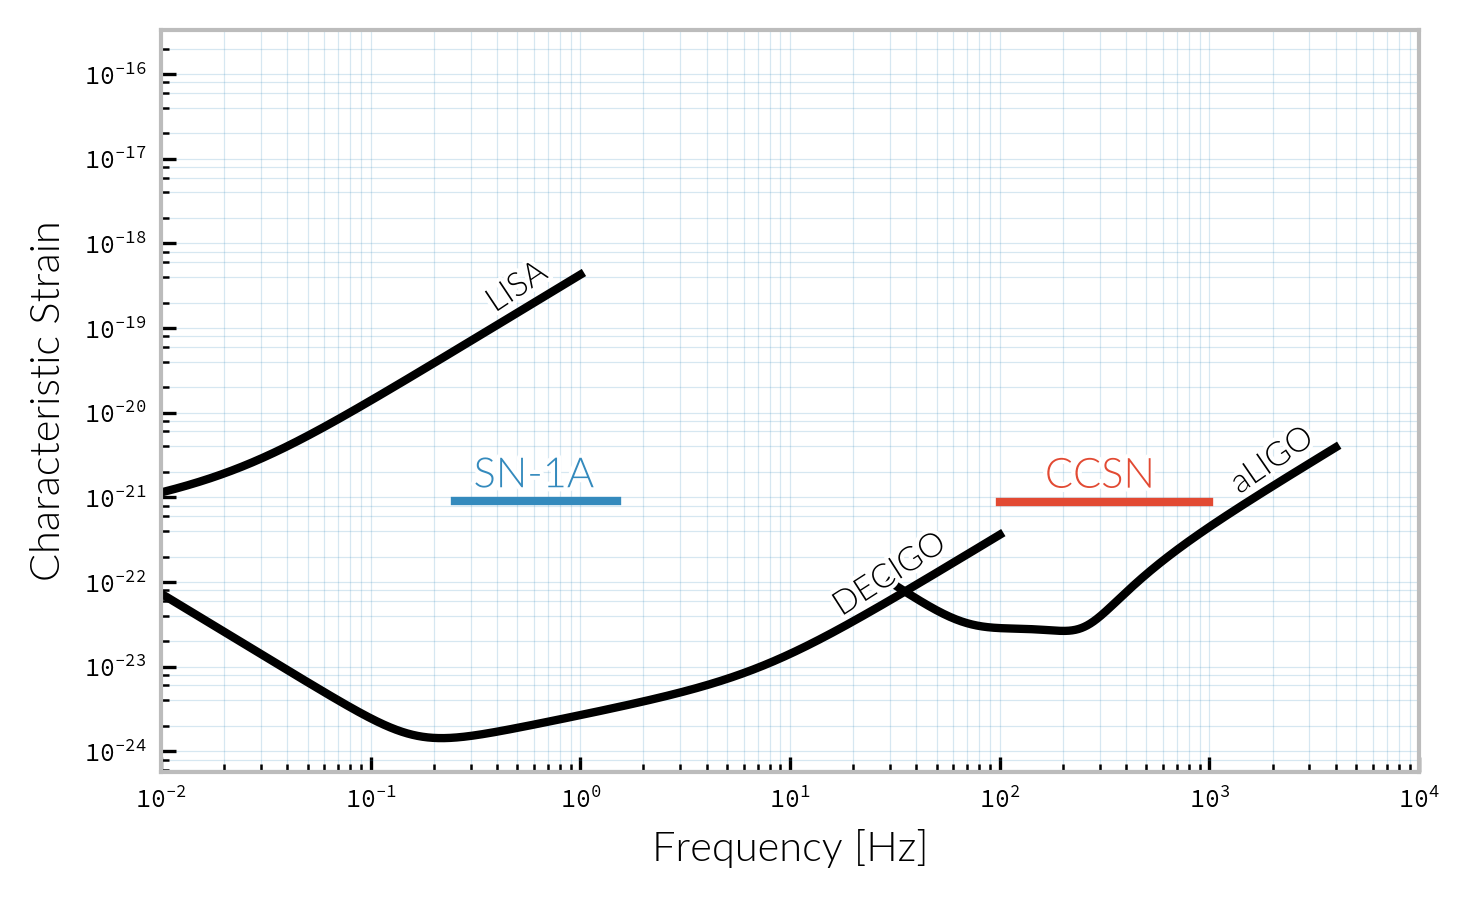

In [12]:
# aligo = ifo.AdvancedLIGO()
lisa = ifo.LISA()
decigo = ifo.Decigo()

figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, dpi=300)

ax.set_xlim([1e-2, 1e4]);
aligo_line = aligo.plot(ax, color="k")[0]
lisa_line = lisa.plot(ax, color='k')[0]
decigo_line = decigo.plot(ax, color='k')[0]

thesis.labelLine(decigo_line, x=30, label="DECIGO", fontsize=8)
thesis.labelLine(aligo_line, x=2000, label="aLIGO", fontsize=8)
thesis.labelLine(lisa_line, x=0.5, label="LISA", fontsize=8)

#thesis.labelLines(fig.gca().get_lines(), fontsize=8)

ccsn = sources.CoreCollapseSupernova(r=10*u.kiloparsec)
t1as = sources.Type1ASupernova(r=10*u.kiloparsec)
core_line = ccsn.plot(ax)[0]
t1as_line = t1as.plot(ax)[0]

thesis.labelLine(core_line, x=300, label="CCSN")

thesis.labelLine(t1as_line, x=0.6, label="SN-1A")



#ax.set_ylim([1e-23, 1e-19]);
#fig.tight_layout()
#fig.legend(loc="upper right")

ax.get_legend().remove()

fig = thesis.thesisify(fig);
fig.savefig("{}/sources/source-ccsn.{}".format(fig_dir, fig_ext), dpi=300)

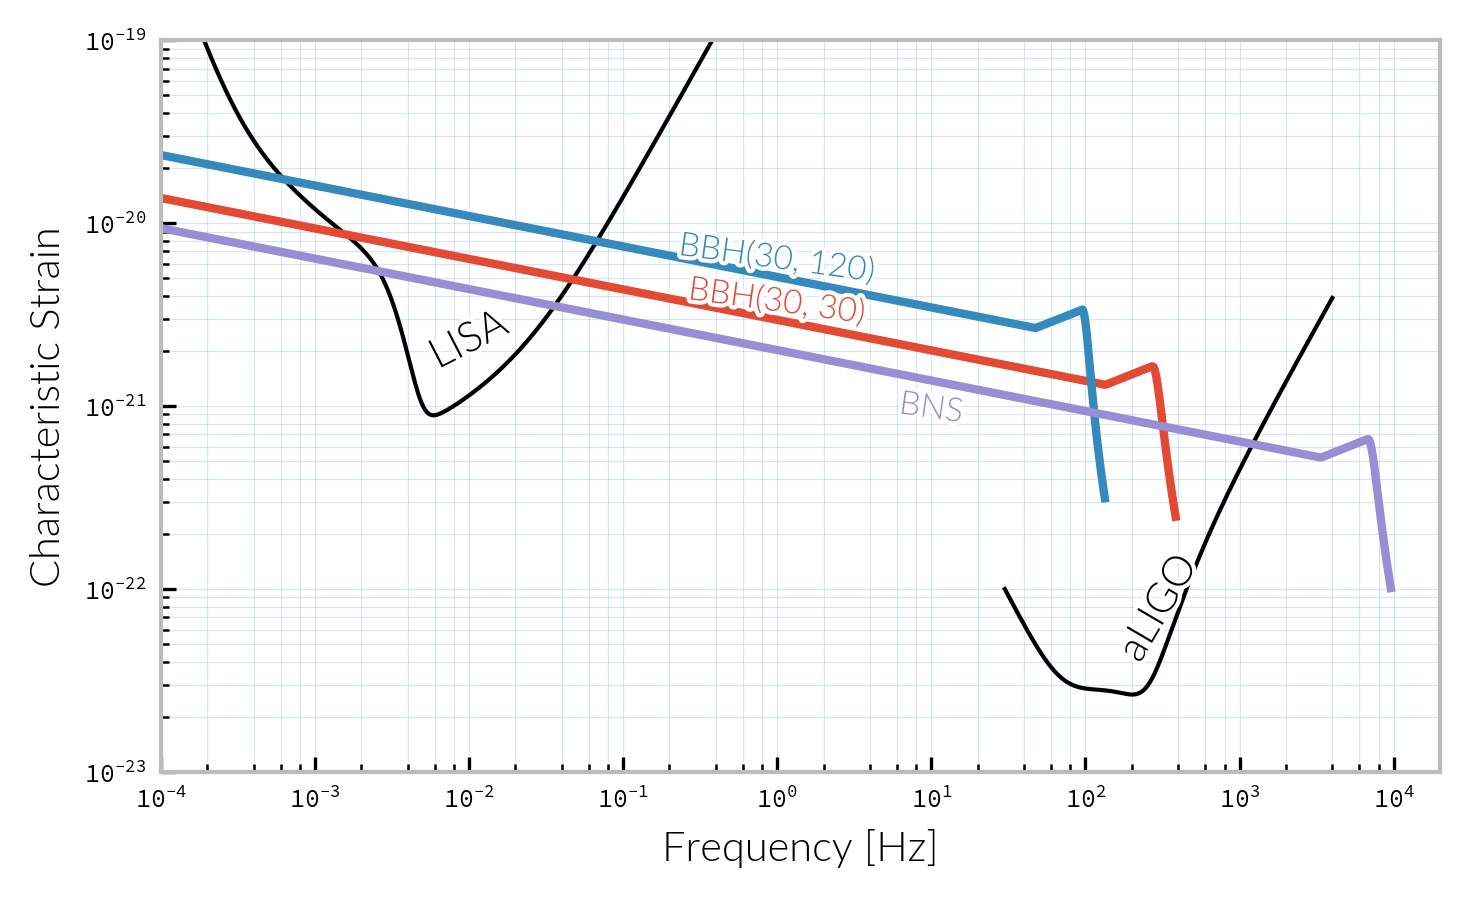

In [13]:
aligo = ifo.AdvancedLIGO()
lisa = ifo.LISA()

figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, dpi=300)
aligo_line = aligo.plot(ax, color='k', lw=1)[0]
lisa_line = lisa.plot(ax, color='k', lw=1)[0]

thesis.labelLine(lisa_line, label="LISA", x=1e-2)
thesis.labelLine(aligo_line, label="aLIGO", x=3e2)

mass = 30
for mass2 in [30, 120]:
    cbc = sources.IMR(frequencies=np.logspace(-4, 5, 1000) * u.hertz,
                    m1=mass*u.solMass, m2=mass2*u.solMass, r=0.8*1e9*u.parsec)
    cbc_line = cbc.plot(ax, label="{}, {}".format(mass, mass2))[0]
    thesis.labelLine(cbc_line, label="BBH({}, {})".format(mass, mass2), x=1, yshift=1.25, fontsize=8)
    
cbc = sources.IMR(frequencies=np.logspace(-4, 5, 1000) * u.hertz,
                m1=1.2*u.solMass, m2=1.2*u.solMass, r=0.8*1e8*u.parsec)
bns_line = cbc.plot(ax, label="BNS".format(mass, mass2))[0]

thesis.labelLine(bns_line, label="BNS".format(mass, mass2), x=10, yshift=0.7, fontsize=8)

ax.set_xlim([1e-4, 2e4]);
ax.set_ylim([1e-23, 1e-19]);
#fig.tight_layout()
#fig.legend(loc="upper right")

ax.get_legend().remove()

fig = thesis.thesisify(fig);
#thesis.labelLines(fig.gca().get_lines(), fontsize=8)
fig.savefig("{}/sources/aligo-cbc.{}".format(fig_dir, fig_ext), dpi=300)

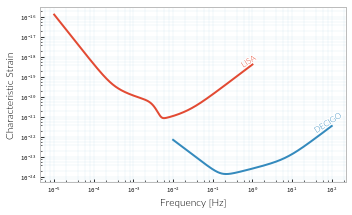

In [14]:
lisa = ifo.LISA()
decigo = ifo.Decigo()
decigo.name = "DECIGO"
figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, figsize=figsize)
lisa.plot(ax)
decigo.plot(ax)
#ax.set_xlim([1e-1, 2e3]);
#ax.set_ylim([1e-23, 1e-19]);

thesis.labelLines(fig.gca().get_lines(), fontsize=8)
thesis.thesisify(fig)
fig.savefig("{}/intro/space-asd.{}".format(fig_dir, fig_ext), dpi=300)


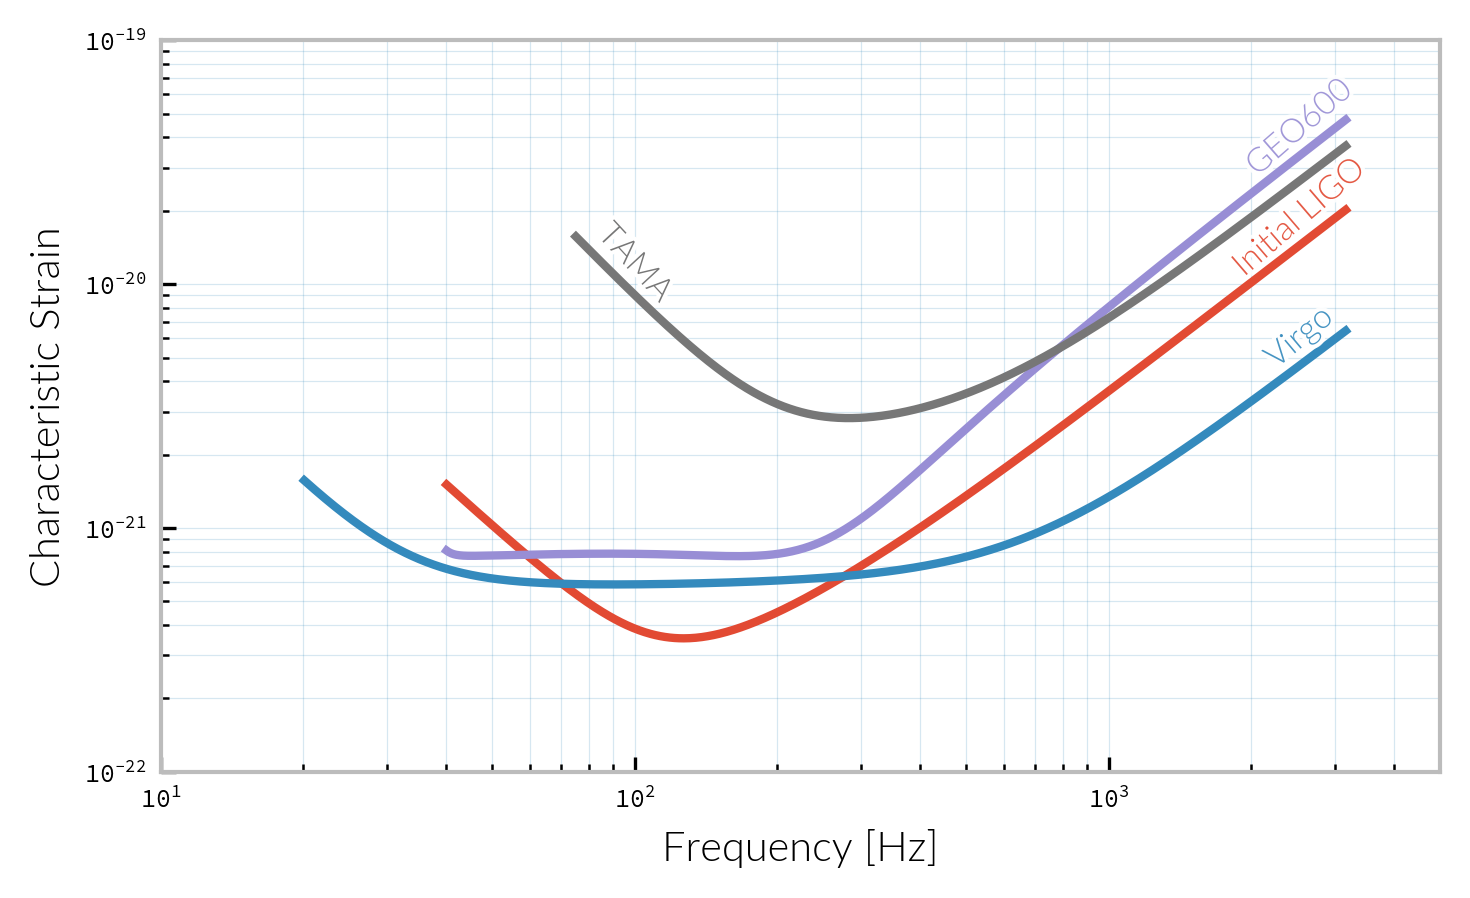

In [15]:
iligo = ifo.InitialLIGO(frequencies=np.logspace(1,3.5,1000)*u.hertz)
virgo = ifo.Virgo(frequencies=np.logspace(1,3.5,1000)*u.hertz)
geo = ifo.GEO(frequencies=np.logspace(1,3.5,1000)*u.hertz)
tama = ifo.TAMA(frequencies=np.logspace(1,3.5,1000)*u.hertz)

fig, ax = plt.subplots(1,1, dpi = 300)
iligo.plot(ax)
virgo.plot(ax)
geo.plot(ax)

tama_line = tama.plot(ax)[0]

ax.set_xlim([1e1, 5e3]);
ax.set_ylim([1e-22, 1e-19]);
fig.tight_layout()
thesis.labelLines(fig.gca().get_lines()[:-1], fontsize=8, yshift = 1.3, alpha=0.9)
thesis.labelLine(tama_line, label="TAMA", x=100, yshift=1.35, fontsize=8)
fig = thesis.thesisify(fig);

fig.savefig("{}/intro/first-gen-asd.{}".format(fig_dir, fig_ext))